In [1]:
# pandas is used for data manipulation and analysis
import pandas as pd

# matplotlib is used for data visualization
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file
# encoding is specified because this dataset contains special characters
df = pd.read_csv(r"D:\archive (1)\online_retail.csv")

# Display first 5 rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Display information about columns, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# Remove rows that contain any missing (NaN) values
df = df.dropna()

In [5]:
# Cancelled orders have InvoiceNo starting with 'C'
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

In [6]:
# Keep only positive Quantity and UnitPrice values
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

In [7]:
# Revenue = Quantity × Unit Price
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

# View updated data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [8]:
# Calculate total revenue generated by the business
total_revenue = df["Revenue"].sum()

total_revenue

np.float64(8911407.904)

In [9]:
# Group data by Country and calculate total revenue
country_sales = df.groupby("Country")["Revenue"].sum()

# Sort revenue in descending order
country_sales = country_sales.sort_values(ascending=False)

# Display top 10 countries
country_sales.head(50)

Country
United Kingdom          7308391.554
Netherlands              285446.340
EIRE                     265545.900
Germany                  228867.140
France                   209024.050
Australia                138521.310
Spain                     61577.110
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33439.890
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13590.380
Austria                   10198.680
Poland                     7334.650
Israel                     7221.690
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

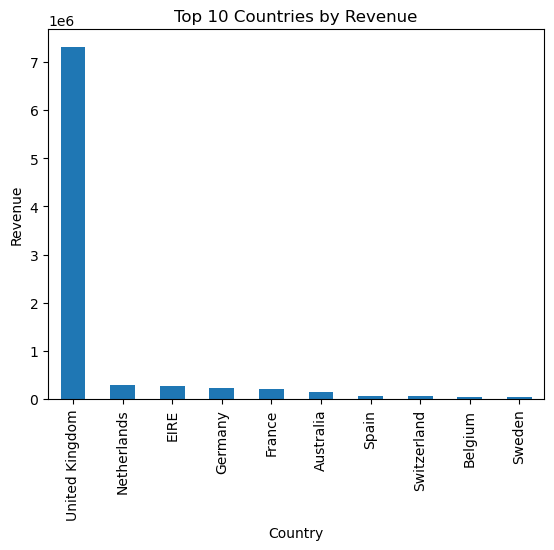

In [10]:
# Plot top 10 countries by revenue
country_sales.head(10).plot(kind="bar")

plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.show()

In [11]:
# Convert InvoiceDate column to datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [12]:
# Extract month and year for monthly analysis
df["Month"] = df["InvoiceDate"].dt.to_period("M")

In [13]:
# Group by Month and calculate revenue
monthly_sales = df.groupby("Month")["Revenue"].sum()

monthly_sales

Month
2010-12     572713.890
2011-01     569445.040
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     518192.790
Freq: M, Name: Revenue, dtype: float64

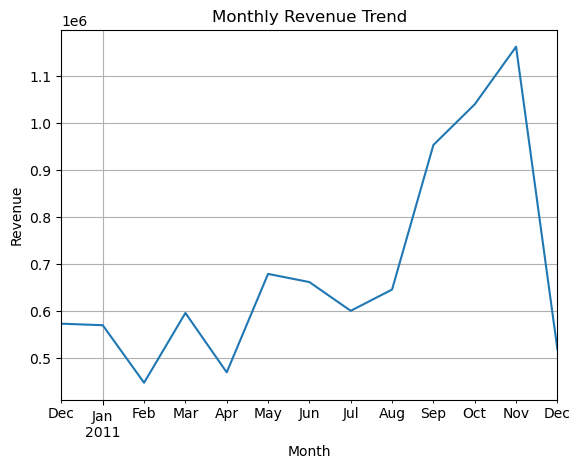

In [14]:
# Plot monthly revenue trend
monthly_sales.plot()

plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid()
plt.show()

In [15]:
# Group by Product Description and sum revenue
top_products = df.groupby("Description")["Revenue"].sum()

# Sort and select top 10 products
top_products = top_products.sort_values(ascending=False).head(10)

top_products

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: Revenue, dtype: float64

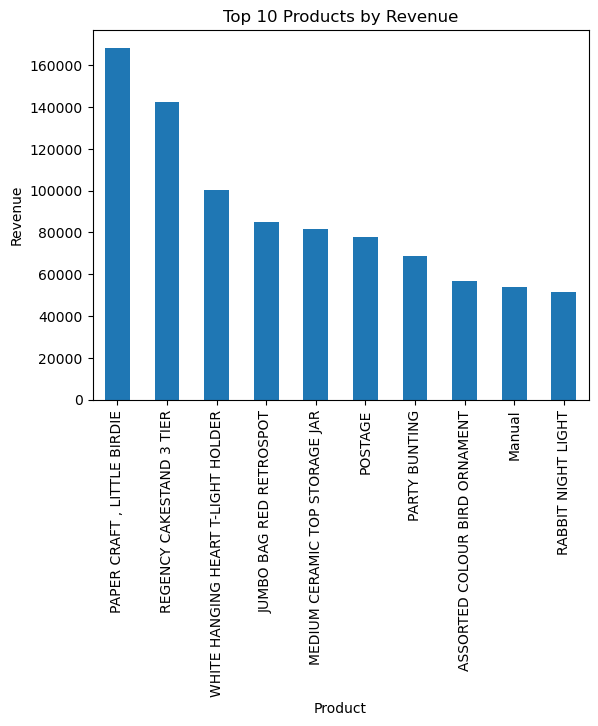

In [16]:
# Plot top 10 products by revenue
top_products.plot(kind="bar")

plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()

In [17]:
# Filter data for United Kingdom only
uk_data = df[df["Country"] == "United Kingdom"]

# Calculate UK revenue
uk_revenue = uk_data["Revenue"].sum()

uk_revenue

np.float64(7308391.554)